In [ ]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'
#! ls '/gdrive/MyDrive/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Data Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
t1 = time.time()
pd.set_option('display.max_columns',None)  #to show all columns
airbnb=pd.read_csv(root+"AB_NYC_2019.csv",parse_dates=['last_review'])  #reading dataset
airbnb.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaT                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

In [ ]:
s_time = time.time()
print("The dataset name : New York City Airbnb Open Data ,AB_NYC_2019 ")
print("Number of features in dataset: ", len(airbnb.columns))
print("Number of records in dataset: ", len(airbnb))
print(f'run time : {time.time() - s_time}')

The dataset name : New York City Airbnb Open Data ,AB_NYC_2019 
Number of features in dataset:  16
Number of records in dataset:  48895
run time : 0.0034122467041015625


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
BBox = ((airbnb.longitude.min(),  airbnb.longitude.max(), airbnb.latitude.min(), airbnb.latitude.max() ))

(40.49979, 40.91306)

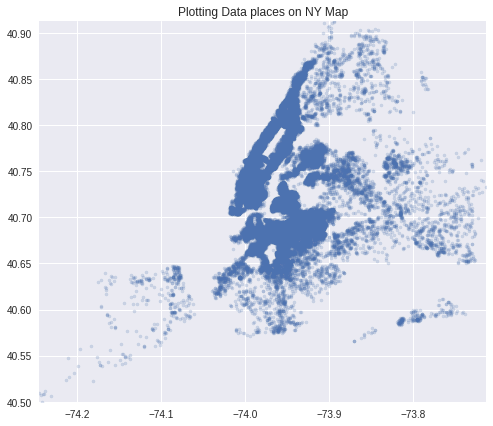

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
#ruh_m = plt.imread('geo:40.7015,-74.4859?z=9')
ax.scatter(airbnb.longitude, airbnb.latitude,zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Data places on NY Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(X,rhum='NY.png', zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
s_time = time.time()
airbnb['x'] = np.cos(airbnb['latitude']) * np.cos(airbnb['longitude'])
airbnb['y'] = np.cos(airbnb['latitude']) * np.sin(airbnb['longitude'])
airbnb['z'] = np.sin(airbnb['latitude'])
print(f'run time : {time.time() - s_time}')

run time : 0.019214391708374023


In [ ]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaT   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

          x         y         z  
0 -0.141748 -0.971101  0.192015  
1 -0.155116 -0.984060  0.086974  
2 -0.114165 -0.992957  0.031679  
3 -0.130353 -0.979287  0.154938  
4 -0.116195 -0.992330  0.042182

In [ ]:
#to avoid changing in ids as numbers while normalization
s_time = time.time()
airbnb['id']= airbnb['id'].astype(str)
airbnb['host_id']= airbnb['host_id'].astype(str)
print(f'run time : {time.time() - s_time}')

run time : 0.1040792465209961


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  object        
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  object        
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
airbnb.describe(include=[object])  

id            name    host_id host_name neighbourhood_group  \
count   48895           48879      48895     48874               48895   
unique  48895           47905      37457     11452                   5   
top      2539  Hillside Hotel  219517861   Michael           Manhattan   
freq        1              18        327       417               21661   

       neighbourhood        room_type  
count          48895            48895  
unique           221                3  
top     Williamsburg  Entire home/apt  
freq            3920            25409

In [ ]:
s_time = time.time()
print("list of features and their types:")
print(airbnb.dtypes)
print(f'run time : {time.time() - s_time}')

list of features and their types:
id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
x                                        float64
y                                        float64
z                                        float64
dtype: object
run time : 0.00271439

# Preprocessing data

In [ ]:
s_time = time.time()
print(airbnb.count())
print(f'run time : {time.time() - s_time}')

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
x                                 48895
y                                 48895
z                                 48895
dtype: int64
run time : 0.02913641929626465


**Checking the missing data**

As we can see, the number of records are not the same, so it's clear that we have some null data that should be managed:







In [ ]:
s_time = time.time()
print("number of null values in each column:")
print(airbnb.isna().sum() ) #null count for each feature
print(f'run time : {time.time() - s_time}')

number of null values in each column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
x                                     0
y                                     0
z                                     0
dtype: int64
run time : 0.02658843994140625


**Delete duplicates**

In [ ]:
s_time = time.time()
airbnb=airbnb.drop_duplicates()  #delete duplicate records
print(f'run time : {time.time() - s_time}')

run time : 0.11406302452087402


**Delete culomns with more than %50 null values (if such columns exist):**

In [ ]:
s_time = time.time()
print('\nfeatures:\t\tpercent of null values:')
print(airbnb.isna().sum()/len(airbnb))
print(f'run time : {time.time() - s_time}')


features:		percent of null values:
id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
x                                 0.000000
y                                 0.000000
z                                 0.000000
dtype: float64
run time : 0.026650667190551758


In [ ]:
s_time = time.time()
nullcolumns=airbnb.columns[((airbnb.isna().sum()/len(airbnb)) > 0.50)] #mask
print(f'run time : {time.time() - s_time}')

run time : 0.03261303901672363


In [ ]:
s_time = time.time()
airbnb=airbnb.drop(nullcolumns,axis=1)   
airbnb.shape
print(f'run time : {time.time() - s_time}')

run time : 0.013201236724853516


**Delete culomns without usefull information(if such columns exist):**


In [ ]:
s_time = time.time()
airbnb=airbnb.drop(columns=['id'])
print(airbnb.shape)
print(f'run time : {time.time() - s_time}')

(48895, 18)
run time : 0.010894298553466797


we can see that number of columns have reduced

**Filling NaN numeric datas with mean of each column**

In [ ]:
s_time = time.time()
print('\nfeatures: \t\t\t mean values:')
print(airbnb._get_numeric_data().mean())
print(f'run time : {time.time() - s_time}')


features: 			 mean values:
latitude                           40.728949
longitude                         -73.952170
price                             152.720687
minimum_nights                      7.029962
number_of_reviews                  23.274466
reviews_per_month                   1.373221
calculated_host_listings_count      7.143982
availability_365                  112.781327
x                                  -0.123336
y                                  -0.983530
z                                   0.111364
dtype: float64
run time : 0.005349874496459961


In [ ]:
s_time = time.time()
airbnb.fillna(airbnb._get_numeric_data().mean(),inplace = True)
print(f'run time : {time.time() - s_time}')

run time : 0.011644840240478516


In [ ]:
s_time = time.time()
airbnb.isna().sum()
print(f'run time : {time.time() - s_time}')

run time : 0.022254467010498047


**Fill NaN date datas**

In [ ]:
s_time = time.time()
airbnb.last_review=airbnb.last_review.fillna('20120101')    #fill nan dates
print(airbnb.head())
print(f'run time : {time.time() - s_time}')

                                               name host_id    host_name  \
0                Clean & quiet apt home by the park    2787         John   
1                             Skylit Midtown Castle    2845     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !    4632    Elisabeth   
3                   Cozy Entire Floor of Brownstone    4869  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park    7192        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0 

In [ ]:
s_time = time.time()
print(airbnb.isna().sum())
print(f'run time : {time.time() - s_time}')

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
x                                  0
y                                  0
z                                  0
dtype: int64
run time : 0.029038429260253906


In [ ]:
#airbnb

**Dataset plot before normalization**

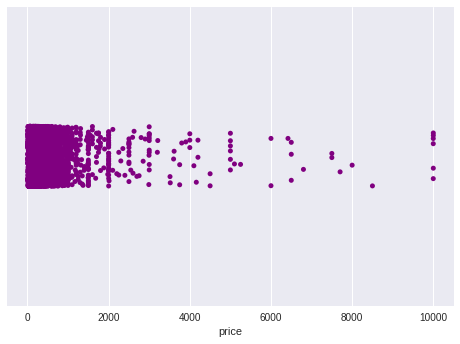

In [ ]:
import seaborn as sns

sns.stripplot(x=airbnb.price,color='purple',marker='o')    
plt.show()


**Data normalization**

Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range.

Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.

In [ ]:
#airbnb.info()

In [ ]:
#from sklearn import preprocessing
#normalize the data attributes
#normalized = preprocessing.normalize(airbnb)
#print("Normalized Data = ", normalized)

In [ ]:
s_time = time.time()
for cols in airbnb.columns:
   if (airbnb[cols].dtypes == 'int64' or airbnb[cols].dtypes == 'float64'):
       #normalized = preprocessing.normalize(airbnb[cols])
       airbnb[cols]=(airbnb[cols]-airbnb[cols].mean())/airbnb[cols].std()
       print(airbnb[cols])
       print('-------------------------------------')

print(f'run time : {time.time() - s_time}')       

0       -1.493834
1        0.452431
2        1.468384
3       -0.803389
4        1.275647
           ...   
48890   -0.924607
48891   -0.497136
48892    1.573464
48893    0.523768
48894    0.643519
Name: latitude, Length: 48895, dtype: float64
-------------------------------------
0       -0.437648
1       -0.684632
2        0.222494
3       -0.164448
4        0.177214
           ...   
48890    0.048089
48891    0.411633
48892    0.075820
48893   -0.843872
48894   -0.805091
Name: longitude, Length: 48895, dtype: float64
-------------------------------------
0       -0.015493
1        0.300970
2       -0.011329
3       -0.265332
4       -0.302808
           ...   
48890   -0.344448
48891   -0.469368
48892   -0.157069
48893   -0.406908
48894   -0.261168
Name: price, Length: 48895, dtype: float64
-------------------------------------
0       -0.293993
1       -0.293993
2       -0.196482
3       -0.293993
4        0.144805
           ...   
48890   -0.245238
48891   -0.147727
48892    0.1

**Dataset distribution plot before deleting outlier data**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


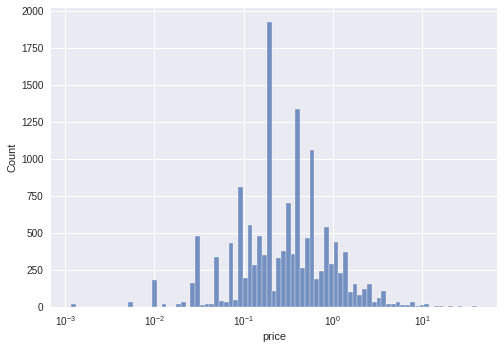

run time : 1.2034637928009033


In [ ]:
s_time = time.time()
import seaborn as sns
sns.histplot(airbnb.price,log_scale=True)    
plt.show()
print(f'run time : {time.time() - s_time}')  

**Delete outlier data**

In [ ]:
airbnb.shape

(48895, 18)

In [ ]:
s_time = time.time()
for cols in airbnb.columns:
   if (airbnb[cols].dtypes == 'int64' or airbnb[cols].dtypes == 'float64'):
       upper_range=(airbnb[cols].mean()+3 )* airbnb[cols].std()
       lower_range=(airbnb[cols].mean()-3 )* airbnb[cols].std()

       indexes=airbnb[(airbnb[cols]>upper_range)|(airbnb[cols]< lower_range)].index
       airbnb=airbnb.drop(indexes)
print(f'run time : {time.time() - s_time}')         

run time : 0.13097929954528809


In [ ]:
airbnb.shape

(42702, 18)

**Dataset distribution plot after deleting outlier data**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


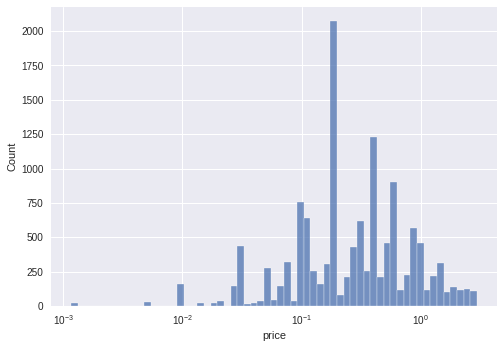

In [ ]:
import seaborn as sns
sns.histplot(x=airbnb.price,log_scale=True)      
plt.show()

# **filling categorical data**

we can replace null datas using 2 methods:
1. replace with most frequents of each columns       or
2. replace with pre-phrases

In [ ]:
s_time = time.time()

print('list of most frequents:\n')  #fill with most frequents
for cols in airbnb.columns:
   if (airbnb[cols].dtypes == 'object' or airbnb[cols].dtypes == 'bool'):
      print(cols,": ",airbnb[cols].value_counts().head(1),"\n")  

print(f'run time : {time.time() - s_time}')        

list of most frequents:

name :  Brooklyn Apartment    12
Name: name, dtype: int64 

host_id :  137358866    103
Name: host_id, dtype: int64 

host_name :  Michael    353
Name: host_name, dtype: int64 

neighbourhood_group :  Manhattan    19658
Name: neighbourhood_group, dtype: int64 

neighbourhood :  Williamsburg    3719
Name: neighbourhood, dtype: int64 

room_type :  Entire home/apt    22172
Name: room_type, dtype: int64 

run time : 0.0778951644897461


**Fill NaN values with most frequents**

In [ ]:
s_time = time.time()
#fill NaN values with most frequents
for cols in airbnb.columns:
   if (airbnb[cols].dtypes == 'object' or airbnb[cols].dtypes == 'bool'):
       airbnb[cols].fillna(airbnb[cols].value_counts().head(1).index[0],
                           inplace=True)
print(f'run time : {time.time() - s_time}')     

run time : 0.0771017074584961


In [ ]:
airbnb.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
x                                 0
y                                 0
z                                 0
dtype: int64

**Categorical features**

In [ ]:
airbnb.dtypes

name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
x                                        float64
y                                        float64
z                                        float64
dtype: object

In [ ]:
#df=airbnb.copy()

In [ ]:
#airbnb.isna().sum()

In [ ]:
s_time = time.time()
for cols in airbnb.columns:
   if (airbnb[cols].dtypes == 'object' or airbnb[cols].dtypes == 'bool'):
      print('column: {}, unique values : {}'.format(cols,airbnb[cols].nunique()))

print(f'run time : {time.time() - s_time}')        

column: name, unique values : 41874
column: host_id, unique values : 33883
column: host_name, unique values : 10417
column: neighbourhood_group, unique values : 4
column: neighbourhood, unique values : 130
column: room_type, unique values : 3
run time : 0.062463998794555664


In [ ]:
s_time = time.time()
l=[]
for cols in airbnb.columns:
   if (airbnb[cols].dtype == 'object' or airbnb[cols].dtype == 'bool'):
       print('column: {}, \n {}'.format(cols,airbnb[cols].value_counts()))
       print("------------------------------------------------------------")
       l.append(cols)    

print(f'run time : {time.time() - s_time}')            

column: name, 
 Brooklyn Apartment                                   27
New york Multi-unit building                         12
Private Room                                         11
Loft Suite @ The Box House Hotel                     11
Home away from home                                  10
                                                     ..
Manhattan downtown luxury apartment                   1
Large & sunny bedroom in Park Slope                   1
Spacious room + private bathroom in Williamsburg      1
Modern Brooklyn Lifestyle                             1
Trendy duplex in the very heart of Hell's Kitchen     1
Name: name, Length: 41874, dtype: int64
------------------------------------------------------------
column: host_id, 
 137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
            ... 
5059784        1
68240110       1
1520629        1
26225727       1
68119814       1
Name: host_id, Length: 33883, dtype: int64
------------------

In [ ]:
l

['name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type']

**Reduce number of categories**

In [ ]:
#airbnb=df.copy()

In [ ]:
s_time = time.time()
others = list(airbnb['neighbourhood'].value_counts().tail(3).index)
def edit_name(x):
    if x in others:
        return 'other'
    else:
        return x

airbnb['neighbourhood_edit'] = airbnb['neighbourhood'].apply(edit_name)
airbnb = airbnb.drop(columns = ['neighbourhood'])
print(airbnb['neighbourhood_edit'].value_counts()*100 / len(airbnb))

print(f'run time : {time.time() - s_time}')  

Williamsburg          8.709194
Bedford-Stuyvesant    8.158868
Harlem                5.896679
Bushwick              5.498571
Upper West Side       4.283172
                        ...   
Mill Basin            0.009367
Olinville             0.007025
Richmond Hill         0.007025
Spuyten Duyvil        0.007025
Bensonhurst           0.007025
Name: neighbourhood_edit, Length: 128, dtype: float64
run time : 0.032766103744506836


In [ ]:
s_time = time.time()
others = list(airbnb['name'].value_counts().tail(5).index)
def edit_name(x):
    if x in others:
        return 'other'
    else:
        return x

airbnb['name_edit'] = airbnb['name'].apply(edit_name)
airbnb = airbnb.drop(columns = ['name'])
print(airbnb['name_edit'].value_counts()*100 / len(airbnb))

print(f'run time : {time.time() - s_time}') 

Brooklyn Apartment                                   0.063229
New york Multi-unit building                         0.028102
Private Room                                         0.025760
Loft Suite @ The Box House Hotel                     0.025760
Home away from home                                  0.023418
                                                       ...   
Beautiful, Sunny Apt by the Park                     0.002342
1 BD Suite W/ Kitchen 550 SQFT Wyn Midtown 45 NYC    0.002342
Samaria's Brownstone (Crown Heights)                 0.002342
2bd Presidential NYC                                 0.002342
43rd St. Time Square-cozy single bed                 0.002342
Name: name_edit, Length: 41870, dtype: float64
run time : 0.06705427169799805


In [ ]:
s_time = time.time()
others = list(airbnb['longitude'].value_counts().tail(3).index)
def edit_longitude(x):
    if x in others:
        return 0
        #return float(airbnb['longitude'].value_counts().head(1))
    else:
        return float(x)

airbnb['longitude_edit'] = airbnb['longitude'].apply(edit_longitude)
airbnb = airbnb.drop(columns = ['longitude'])
print(airbnb['longitude_edit'].value_counts()*100 / len(airbnb))
print(f'run time : {time.time() - s_time}') 

-0.099669    0.042153
-0.045505    0.039811
 0.092286    0.037469
-0.024923    0.037469
-0.040739    0.037469
               ...   
 2.236068    0.002342
 1.249430    0.002342
-0.396700    0.002342
-1.366223    0.002342
 1.622723    0.002342
Name: longitude_edit, Length: 12058, dtype: float64
run time : 0.04484152793884277


In [ ]:
s_time = time.time()
others = list(airbnb['latitude'].value_counts().tail(3).index)
def edit_latitude(x):
    if x in others:
        return 0
        #return float(airbnb['latitude'].value_counts().head(1))
    else:
        return float(x)

airbnb['latitude_edit'] = airbnb['latitude'].apply(edit_latitude)
airbnb = airbnb.drop(columns = ['latitude'])
print(airbnb['latitude_edit'].value_counts()*100 / len(airbnb))
print(f'run time : {time.time() - s_time}') 

-0.198402    0.039811
-0.781383    0.030444
-0.816226    0.030444
-0.282759    0.028102
-0.638343    0.028102
               ...   
-0.430568    0.002342
 2.501026    0.002342
 1.026427    0.002342
 1.737044    0.002342
-0.497136    0.002342
Name: latitude_edit, Length: 17450, dtype: float64
run time : 0.03884148597717285


In [ ]:
s_time = time.time()
others = list(airbnb['neighbourhood_group'].value_counts().tail(3).index)
def edit_neighbourhood_group(x):
    if x in others:
        return 'other'
    else:
        return x

airbnb['neighbourhood_group_edit'] = airbnb['neighbourhood_group'].apply(edit_neighbourhood_group)
airbnb = airbnb.drop(columns = ['neighbourhood_group'])
print(airbnb['neighbourhood_group_edit'].value_counts()*100 / len(airbnb))
print(f'run time : {time.time() - s_time}') 

other        53.964685
Manhattan    46.035315
Name: neighbourhood_group_edit, dtype: float64
run time : 0.04199862480163574


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42702 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         42702 non-null  object        
 1   host_name                       42702 non-null  object        
 2   room_type                       42702 non-null  object        
 3   price                           42702 non-null  float64       
 4   minimum_nights                  42702 non-null  float64       
 5   number_of_reviews               42702 non-null  float64       
 6   last_review                     42702 non-null  datetime64[ns]
 7   reviews_per_month               42702 non-null  float64       
 8   calculated_host_listings_count  42702 non-null  float64       
 9   availability_365                42702 non-null  float64       
 10  x                               42702 non-null  float64       
 11  y 

In [ ]:
airbnb.columns

Index(['host_id', 'host_name', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'x', 'y', 'z',
       'neighbourhood_edit', 'name_edit', 'longitude_edit', 'latitude_edit',
       'neighbourhood_group_edit'],
      dtype='object')

**Correlation matrix**

Using this matrix, we can see the linear convergence of the data.
The closer the numbers to 1,means more convergent , and the closer numbers to -1, means more inversely relations.
In the next steps, we can further study the variables that are more convergent

In [ ]:
#corr=airbnb.corr()

run time : 0.22306418418884277


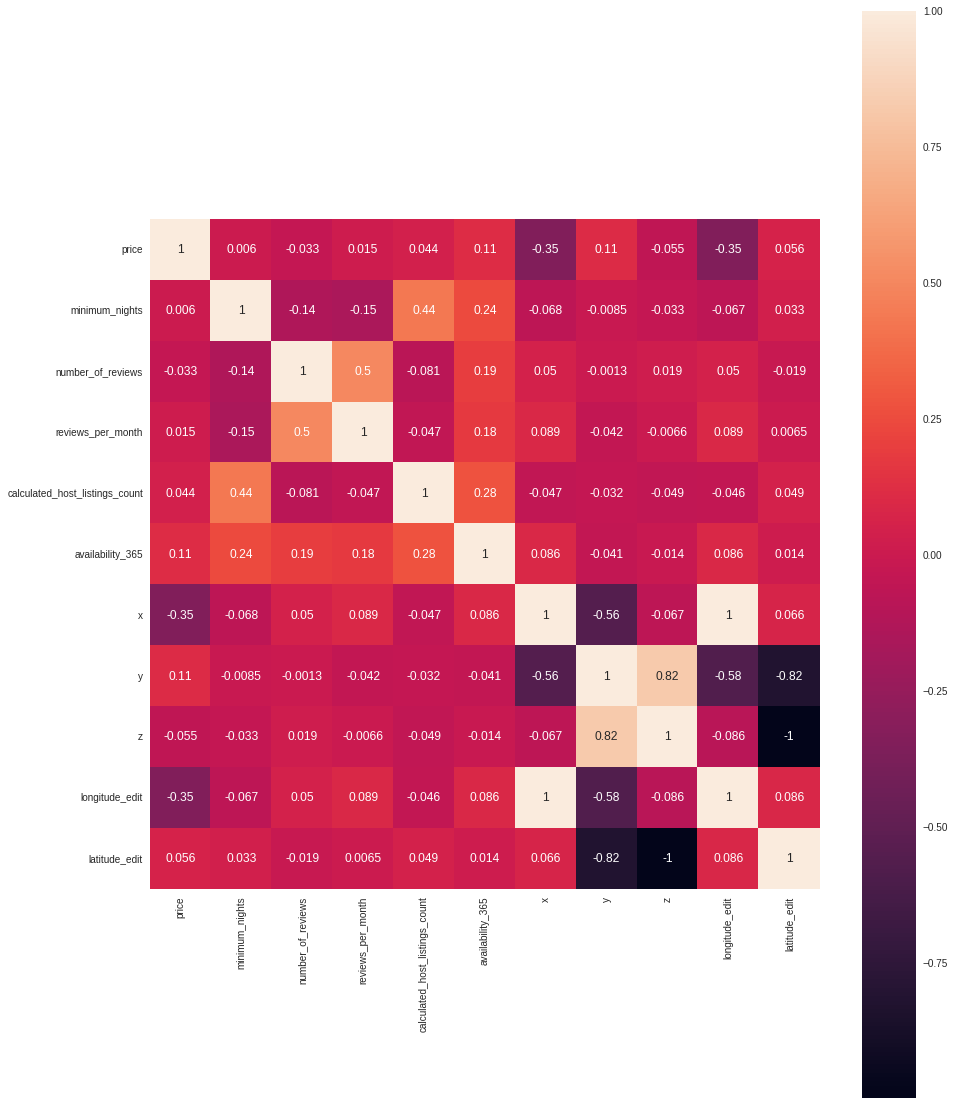

In [ ]:
s_time = time.time()
corr=airbnb.corr()
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize=(15,20))
#sns.heatmap(corr, square = True ,annot = True)

sns.heatmap(corr,square= True,annot=True,vmax=None, cmap=None, center=None,
            cbar=True, cbar_kws=None, cbar_ax=None,  xticklabels="auto", yticklabels="auto")

print(f'run time : {time.time() - s_time}')

In [ ]:
s_time=time.time()
airbnb=airbnb.fillna(method="ffill")
print(f'run time : {time.time() - s_time}')


run time : 0.03492093086242676


# **convert categorical data to dummies**

In [ ]:
s_time=time.time()

columns1=[]
for cols in airbnb.columns:
    if airbnb[cols].dtype == 'object' or airbnb[cols].dtype == 'bool':
        columns1.append(cols)   
print(columns1) 

print(f'run time : {time.time() - s_time}')    

['host_id', 'host_name', 'room_type', 'neighbourhood_edit', 'name_edit', 'neighbourhood_group_edit']
run time : 0.0033986568450927734


In [ ]:
columns1=['room_type', 'neighbourhood_edit', 'name_edit', 'neighbourhood_group_edit']

In [ ]:
s_time=time.time()

s=pd.Series(columns1)
dummies_feature=pd.get_dummies(s)
print(dummies_feature)

print(f'run time : {time.time() - s_time}')   

   name_edit  neighbourhood_edit  neighbourhood_group_edit  room_type
0          0                   0                         0          1
1          0                   1                         0          0
2          1                   0                         0          0
3          0                   0                         1          0
run time : 0.008431434631347656


In [ ]:
s_time=time.time()
airbnb.drop(columns=columns1,inplace=True)
airbnb=pd.concat([airbnb,dummies_feature],axis=1)
print(airbnb.shape)
print(f'run time : {time.time() - s_time}')

(42703, 18)
run time : 0.036763906478881836


In [ ]:
airbnb = airbnb.dropna(how='all', axis=1)
airbnb

host_id      host_name     price  minimum_nights  number_of_reviews  \
0          2787           John -0.015493       -0.293993          -0.320410   
1          2845       Jennifer  0.300970       -0.293993           0.487660   
2          4632      Elisabeth -0.011329       -0.196482          -0.522428   
3           NaN            NaN       NaN             NaN                NaN   
4          7192          Laura -0.302808        0.144805          -0.320410   
...         ...            ...       ...             ...                ...   
48890   8232441        Sabrina -0.344448       -0.245238          -0.522428   
48891   6570630        Marisol -0.469368       -0.147727          -0.522428   
48892  23492952  Ilgar & Aysel -0.157069        0.144805          -0.522428   
48893  30985759            Taz -0.406908       -0.293993          -0.522428   
48894  68119814     Christophe -0.261168       -0.001461          -0.522428   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19      -7.766330e-01                       -0.034716   
1      2019-05-21      -6.631313e-01                       -0.156103   
2      2012-01-01       2.668494e-15                       -0.186450   
3             NaT                NaN                             NaN   
4      2018-11-19      -8.500753e-01                       -0.186450   
...           ...                ...                             ...   
48890  2012-01-01       2.668494e-15                       -0.156103   
48891  2012-01-01       2.668494e-15                       -0.156103   
48892  2012-01-01       2.668494e-15                       -0.186450   
48893  2012-01-01       2.668494e-15                       -0.034716   
48894  2012-01-01       2.668494e-15                       -0.186450   

       availability_365         x         y         z  longitude_edit  \
0              1.916231 -0.406389  1.474684  1.489525       -0.437648   
1              1.840256 -0.701463 -0.062916 -0.450443       -0.684632   
2              1.916231  0.202426 -1.118506 -1.471683        0.222494   
3                   NaN       NaN       NaN       NaN             NaN   
4             -0.856856  0.157621 -1.044196 -1.277708        0.177214   
...                 ...       ...       ...       ...             ...   
48890         -0.788478  0.060120  0.480488  0.925302        0.048089   
48891         -0.583346  0.415111 -0.155692  0.499671        0.411633   
48892         -0.651723  0.053666 -1.043547 -1.577465        0.075820   
48893         -0.841661 -0.862205  0.036789 -0.522027       -0.843872   
48894         -0.682113 -0.825208 -0.058571 -0.642243       -0.805091   

       latitude_edit  name_edit  neighbourhood_edit  neighbourhood_group_edit  \
0          -1.493834        0.0                 0.0                       0.0   
1           0.452431        0.0                 1.0                       0.0   
2           1.468384        1.0                 0.0                       0.0   
3                NaN        0.0                 0.0                       1.0   
4           1.275647        NaN                 NaN                       NaN   
...              ...        ...                 ...                       ...   
48890      -0.924607        NaN                 NaN                       NaN   
48891      -0.497136        NaN                 NaN                       NaN   
48892       0.000000        NaN                 NaN                       NaN   
48893       0.523768        NaN                 NaN                       NaN   
48894       0.643519        NaN                 NaN                       NaN   

       room_type  
0            1.0  
1            0.0  
2            0.0  
3            0.0  
4            NaN  
...          ...  
48890        NaN  
48891        NaN  
48892        NaN  
48893        NaN  
48894        NaN  

[42703 rows x 18 columns]

In [ ]:
s_time=time.time()
airbnb=airbnb.fillna(method="ffill")
print(f'run time : {time.time() - s_time}')

run time : 0.022757291793823242


In [ ]:
airbnb.isna().sum()

host_id                           0
host_name                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
x                                 0
y                                 0
z                                 0
longitude_edit                    0
latitude_edit                     0
name_edit                         0
neighbourhood_edit                0
neighbourhood_group_edit          0
room_type                         0
dtype: int64

In [ ]:
airbnb.shape

(42703, 18)

In [ ]:
airbnb.dtypes

host_id                                   object
host_name                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
x                                        float64
y                                        float64
z                                        float64
longitude_edit                           float64
latitude_edit                            float64
name_edit                                float64
neighbourhood_edit                       float64
neighbourhood_group_edit                 float64
room_type                                float64
dtype: object

run time : 0.019847869873046875


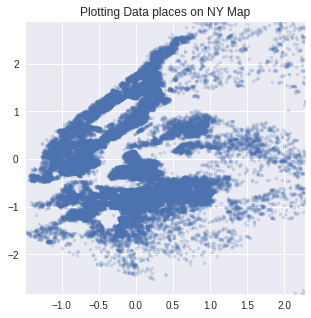

In [ ]:
s_time=time.time()
BBox = ((airbnb.longitude_edit.min(),  airbnb.longitude_edit.max(), airbnb.latitude_edit.min(), airbnb.latitude_edit.max() ))
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(airbnb.longitude_edit, airbnb.latitude_edit, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Data places on NY Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#ax.imshow(X,rhum='NY.png', zorder=0, extent = BBox, aspect= 'equal')

print(f'run time : {time.time() - s_time}')

# PCA
Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
s_time=time.time()
print(airbnb.reset_index)

print(f'run time : {time.time() - s_time}')

<bound method DataFrame.reset_index of         host_id      host_name     price  minimum_nights  number_of_reviews  \
0          2787           John -0.015493       -0.293993          -0.320410   
1          2845       Jennifer  0.300970       -0.293993           0.487660   
2          4632      Elisabeth -0.011329       -0.196482          -0.522428   
3          4632      Elisabeth -0.011329       -0.196482          -0.522428   
4          7192          Laura -0.302808        0.144805          -0.320410   
...         ...            ...       ...             ...                ...   
48890   8232441        Sabrina -0.344448       -0.245238          -0.522428   
48891   6570630        Marisol -0.469368       -0.147727          -0.522428   
48892  23492952  Ilgar & Aysel -0.157069        0.144805          -0.522428   
48893  30985759            Taz -0.406908       -0.293993          -0.522428   
48894  68119814     Christophe -0.261168       -0.001461          -0.522428   

      last_r

**Split features and target**

In [ ]:
s_time=time.time()
# Splitting data into y as target and x as features 
y= airbnb['price']
X= airbnb.drop(columns=['price','last_review','host_id','host_name'])
print(X.dtypes)
print(f'run time : {time.time() - s_time}')


minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
x                                 float64
y                                 float64
z                                 float64
longitude_edit                    float64
latitude_edit                     float64
name_edit                         float64
neighbourhood_edit                float64
neighbourhood_group_edit          float64
room_type                         float64
dtype: object
run time : 0.007303476333618164


In [ ]:
print(X.shape)
print(y.shape)

(42703, 14)
(42703,)


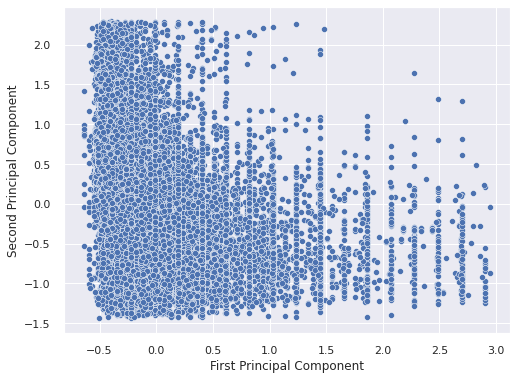

run time : 0.41802024841308594


In [ ]:
s_time=time.time()
# giving a larger plot
plt.figure(figsize =(8, 6))

sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='price',y='x', data=airbnb)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

print(f'run time : {time.time() - s_time}')

In [ ]:
s_time = time.time()
from sklearn.decomposition import PCA
pca = PCA(0.70)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])

print(f'run time : {time.time() - s_time}')

(42703, 3)
[[-2.62678489  1.24242722 -1.07819435]]
run time : 0.06206154823303223


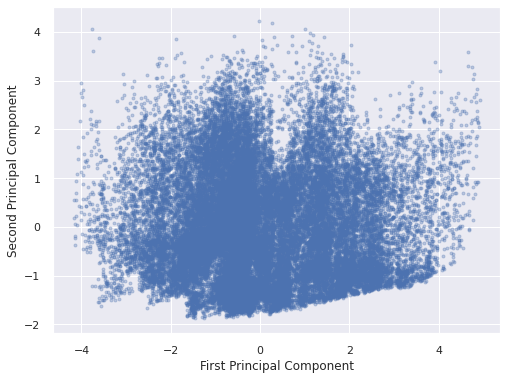

run time : 0.3828403949737549


In [ ]:
s_time = time.time()

# giving a larger plot
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1],marker='.',cmap ='plasma',alpha=0.3)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

print(f'run time : {time.time() - s_time}')

In [ ]:
s_time = time.time()

from sklearn.decomposition import PCA
pca = PCA(0.80)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])
print(f'run time : {time.time() - s_time}')

(42703, 4)
[[-2.62678489  1.24242722 -1.07819435 -1.27128183]]
run time : 0.049172163009643555


In [ ]:
s_time = time.time()

from sklearn.decomposition import PCA
pca = PCA(0.90)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])
print(f'run time : {time.time() - s_time}')

(42703, 4)
[[-2.62678489  1.24242722 -1.07819435 -1.27128183]]
run time : 0.05163836479187012


In [ ]:
s_time = time.time()

from sklearn.decomposition import PCA
pca = PCA(0.99)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])
print(f'run time : {time.time() - s_time}')

(42703, 7)
[[-2.62678489  1.24242722 -1.07819435 -1.27128183  0.24854937 -0.67403257
   0.13686889]]
run time : 0.04241299629211426


run time : 0.02919316291809082


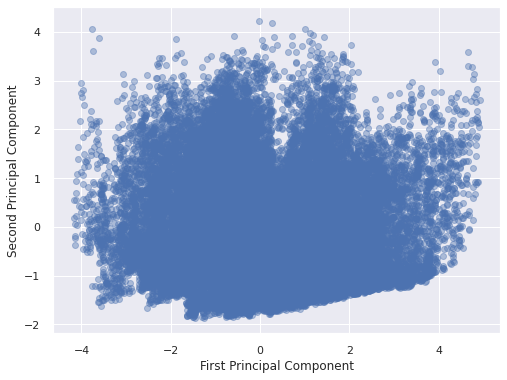

In [ ]:
s_time = time.time()
# giving a larger plot
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap ='plasma',alpha=0.4)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

print(f'run time : {time.time() - s_time}')

In [ ]:
s_time = time.time()
print(X.describe())
print(f'run time : {time.time() - s_time}')

       minimum_nights  number_of_reviews  reviews_per_month  \
count    42703.000000       42703.000000       4.270300e+04   
mean        -0.051625          -0.128052      -1.442986e-01   
std          0.432457           0.653549       7.318491e-01   
min         -0.293993          -0.522428      -9.101645e-01   
25%         -0.245238          -0.499981      -7.566033e-01   
50%         -0.196482          -0.410196      -2.491839e-01   
75%         -0.098972          -0.073500       2.668494e-15   
max          2.972618           2.956763       2.648448e+00   

       calculated_host_listings_count  availability_365             x  \
count                    42703.000000      42703.000000  42703.000000   
mean                        -0.103232         -0.078953     -0.086798   
std                          0.349297          0.977006      0.682988   
min                         -0.186450         -0.856856     -1.435001   
25%                         -0.186450         -0.856856     -0.6559

In [ ]:
s_time = time.time()
from sklearn.linear_model import LinearRegression

#df=airbnb._get_numeric_data()
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)

print(f'run time : {time.time() - s_time}')

run time : 0.027737855911254883


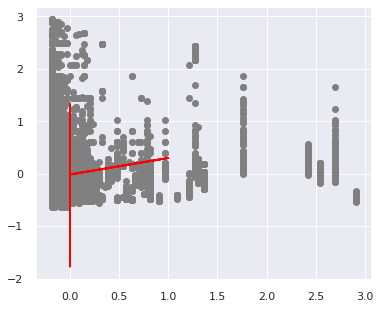

run time : 0.4133119583129883


In [ ]:
s_time = time.time()

plt.figure(figsize =(6,5))
plt.scatter(X['calculated_host_listings_count'],y,color='gray')
plt.plot(X['neighbourhood_edit'],y_pred,color='red',linewidth=2)
plt.show()
print(f'run time : {time.time() - s_time}')

**linear regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
s_time = time.time()
x = np.array(airbnb['price']).reshape((-1, 1))
y = np.array(X)
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
print(f'run time : {time.time() - s_time}')

run time : 0.037748098373413086


**Get results**

properties of the model

In [ ]:
s_time = time.time()
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:')
print(model.intercept_)
print('slope:')
print(model.coef_)
print(f'run time : {time.time() - s_time}')

coefficient of determination: 0.019546657377633687
intercept:
[-5.13258841e-02 -1.30521833e-01 -1.43048355e-01 -1.01463568e-01
 -6.63442724e-02 -1.14087594e-01 -5.32741449e-02 -5.52750111e-02
 -1.10846912e-01  5.57091686e-02  2.36589435e-05  2.55171989e-05
  9.99927190e-01  2.36341668e-05]
slope:
[[ 5.76590364e-03]
 [-4.75835418e-02]
 [ 2.40910708e-02]
 [ 3.40810195e-02]
 [ 2.42951951e-01]
 [-5.25852305e-01]
 [ 1.80322621e-01]
 [-1.15648691e-01]
 [-5.19442979e-01]
 [ 1.16919839e-01]
 [ 4.65130310e-06]
 [ 4.04584437e-05]
 [-4.92836214e-05]
 [ 4.17387456e-06]]
run time : 0.0212552547454834


In [ ]:
s_time = time.time()
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
print(f'run time : {time.time() - s_time}')

predicted response:
[[-5.14152147e-02 -1.29784625e-01 -1.43421595e-01 ...  2.48903798e-05
   9.99927953e-01  2.35695013e-05]
 [-4.95905174e-02 -1.44843073e-01 -1.35797654e-01 ...  3.76939956e-05
   9.99912357e-01  2.48903798e-05]
 [-5.13912055e-02 -1.29982762e-01 -1.43321280e-01 ...  2.50588484e-05
   9.99927748e-01  2.35868813e-05]
 ...
 [-5.22315267e-02 -1.23047951e-01 -1.46832306e-01 ...  1.91624464e-05
   9.99934931e-01  2.29785820e-05]
 [-5.36720772e-02 -1.11159702e-01 -1.52851207e-01 ...  9.05432866e-06
   9.99947244e-01  2.19357833e-05]
 [-5.28317561e-02 -1.18094514e-01 -1.49340182e-01 ...  1.49507307e-05
   9.99940061e-01  2.25440825e-05]]
run time : 0.009159088134765625


**Linear Regression**

MAE: 0.38346036850335974
MSE: 0.38493322235486255
R2_score: 0.019546657377633687
run time : 0.18415474891662598


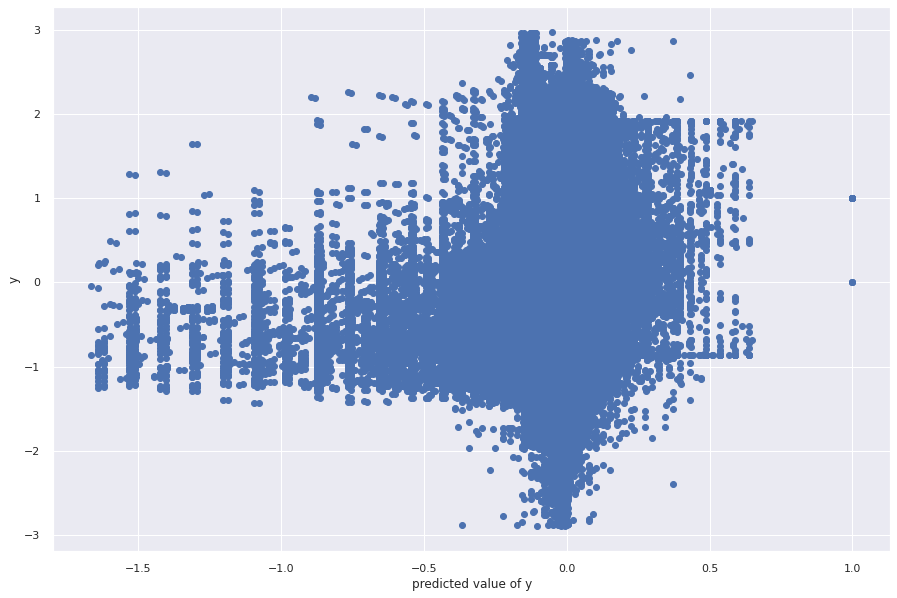

<Figure size 1080x720 with 0 Axes>

In [ ]:
s_time = time.time()
from sklearn import metrics
prediction = []
def linearregression(X, y_pred, x, y):
    linreg = LinearRegression()
    linreg.fit(X, y_pred)
    y_pred = linreg.predict(X)

print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('R2_score:', metrics.r2_score(y, y_pred))

plt.scatter(y_pred,y)
plt.xlabel('predicted value of y')
plt.ylabel('y')
plt.figure()
linearregression(X, y_pred, x, y)
print(f'run time : {time.time() - s_time}')

Random Forest Regresson

MAE: 0.38112298330805144
MSE: 0.3811290185618862
R2_score: 0.02713923820299848
run time : 55.198728799819946


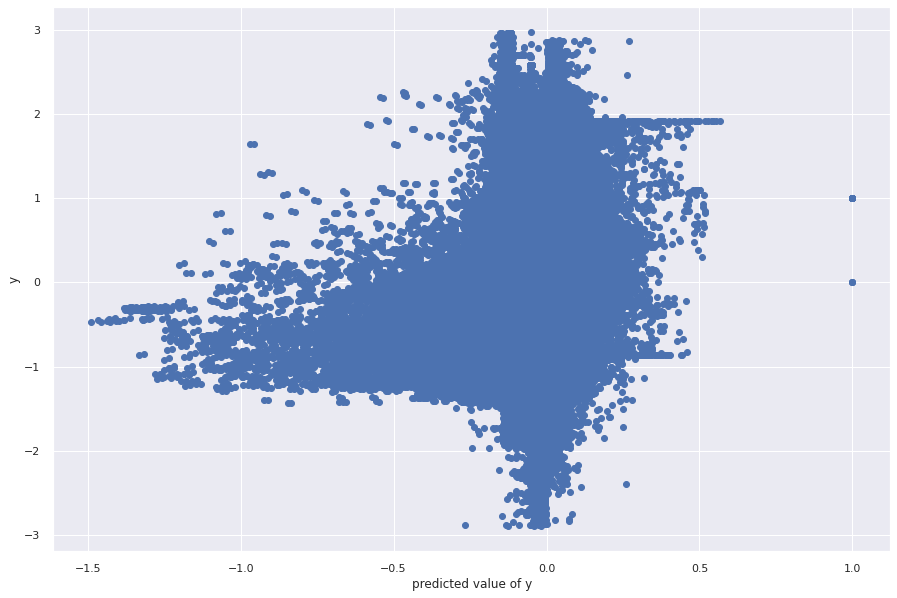

<Figure size 1080x720 with 0 Axes>

In [ ]:
s_time = time.time()

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def RandomForest(X, y_pred, x, y):
    randomForest = RandomForestRegressor()
    randomForest.fit(X, y_pred)
    y_pred = randomForest.predict(X)
    
    print('MAE:', metrics.mean_absolute_error(y, y_pred))
    print('MSE:', metrics.mean_squared_error(y, y_pred))
    print('R2_score:', metrics.r2_score(y, y_pred))

    plt.scatter(y_pred,y,cmap ='plasma')
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()

RandomForest(X, y_pred, x, y)
print(f'run time : {time.time() - s_time}')

**polynomial regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

s_time = time.time()
x = np.array(airbnb['price']).reshape((-1, 1))
y = np.array(X)
transformer = PolynomialFeatures(degree=2, include_bias=False)

transformer.fit(x)   #we need to fit before transfer

x_ = transformer.transform(x)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

print(x_)

model = LinearRegression().fit(x_, y)   #creating model and fit to x

print(f'run time : {time.time() - s_time}')

[[-1.54929110e-02  2.40030292e-04]
 [ 3.00970468e-01  9.05832225e-02]
 [-1.13289192e-02  1.28344410e-04]
 ...
 [-1.57068633e-01  2.46705555e-02]
 [-4.06908143e-01  1.65574237e-01]
 [-2.61168429e-01  6.82089482e-02]]
run time : 0.028332948684692383


**Get results**

properties of the model

In [ ]:
s_time = time.time()

r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:')
print(model.intercept_)
print('coefficients:')
print(model.coef_)

print(f'run time : {time.time() - s_time}')

coefficient of determination: 0.028055647030316537
intercept:
[-4.91476551e-02 -1.19673174e-01 -1.42076960e-01 -9.98523200e-02
 -7.79253034e-02 -2.09207904e-01 -2.14993032e-02 -7.49888136e-02
 -2.04832568e-01  7.56448357e-02  3.14679088e-05  4.04555177e-05
  9.99896770e-01  3.13065747e-05]
coefficients:
[[ 1.42790483e-02 -8.39120903e-03]
 [-5.18386817e-03 -4.17923739e-02]
 [ 2.78875610e-02 -3.74211233e-03]
 [ 4.03782415e-02 -6.20702546e-03]
 [ 1.97689955e-01  4.46136983e-02]
 [-8.97609801e-01  3.66432733e-01]
 [ 3.04507830e-01 -1.22406477e-01]
 [-1.92695893e-01  7.59436389e-02]
 [-8.86765920e-01  3.62061694e-01]
 [ 1.94834152e-01 -7.67983295e-02]
 [ 3.51709823e-05 -3.00825392e-05]
 [ 9.88416847e-05 -5.75470051e-05]
 [-1.68172515e-04  1.17186023e-04]
 [ 3.41598485e-05 -2.95564784e-05]]
run time : 0.024340152740478516


**Fitting Logistic Regression To the dataset**

In [ ]:
s_time = time.time()

# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
df=airbnb._get_numeric_data()

# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
print(x_pca.shape)

print(f'run time : {time.time() - s_time}')

(42703, 2)
run time : 0.12384271621704102


run time : 0.02692556381225586


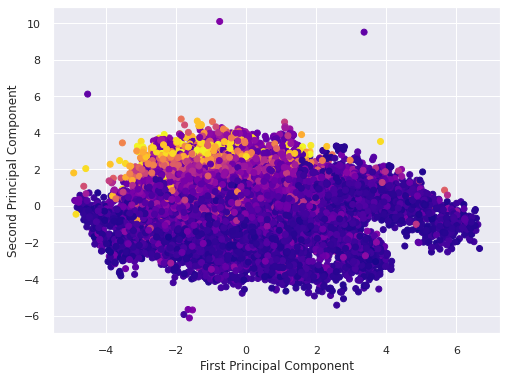

In [ ]:
s_time = time.time()
# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = airbnb['price'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


print(f'run time : {time.time() - s_time}')

In [ ]:
# components
pca.components_

array([[-0.12435356, -0.00623116,  0.02924888,  0.05528243,  0.01215455,
         0.04822078,  0.37457838, -0.54874225, -0.44159967,  0.38302236,
         0.44146296,  0.00518551, -0.00116505,  0.00170464, -0.00697292],
       [ 0.32994367,  0.20829301, -0.18355734, -0.17947729,  0.19490923,
         0.01076198, -0.46130584, -0.09119849, -0.39702314, -0.45234442,
         0.39750469,  0.02180404,  0.02314554, -0.03405056,  0.01402634]])

# **prices**

In [ ]:
airbnb["price"].describe()

count    42703.000000
mean        -0.051896
std          0.451936
min         -0.635928
25%         -0.344448
50%         -0.177889
75%          0.092771
max          2.945105
Name: price, dtype: float64

**quantiles**

In [ ]:
s_time = time.time()

visual_data = airbnb.copy()

print("5%: ",visual_data.quantile(0.05)['price'])
print("25%: ", visual_data.quantile(0.25)['price'])
print("50%: ", visual_data.quantile(0.5)['price'])
print("75%: ", visual_data.quantile(0.75)['price'])
print("95%: ", visual_data.quantile(0.95)['price'])

print(f'run time : {time.time() - s_time}')

5%:  -0.4693680201575976
25%:  -0.34444826535350115
50%:  -0.17788859228137247
75%:  0.09277087646083658
95%:  0.8214694461513994
run time : 0.08555126190185547


In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab
import numpy as np
   
# 1D array
arr =airbnb['price']
print("5 th percentile  : ",
       np.percentile(arr, 5))
print("25th percentile  : ",
       np.percentile(arr, 25))
print("50th percentile  : ",
       np.percentile(arr, 50))
print("75th percentile  : ",
       np.percentile(arr, 75))


5 th percentile  :  -0.4693680201575976
25th percentile  :  -0.34444826535350115
50th percentile  :  -0.17788859228137247
75th percentile  :  0.09277087646083658


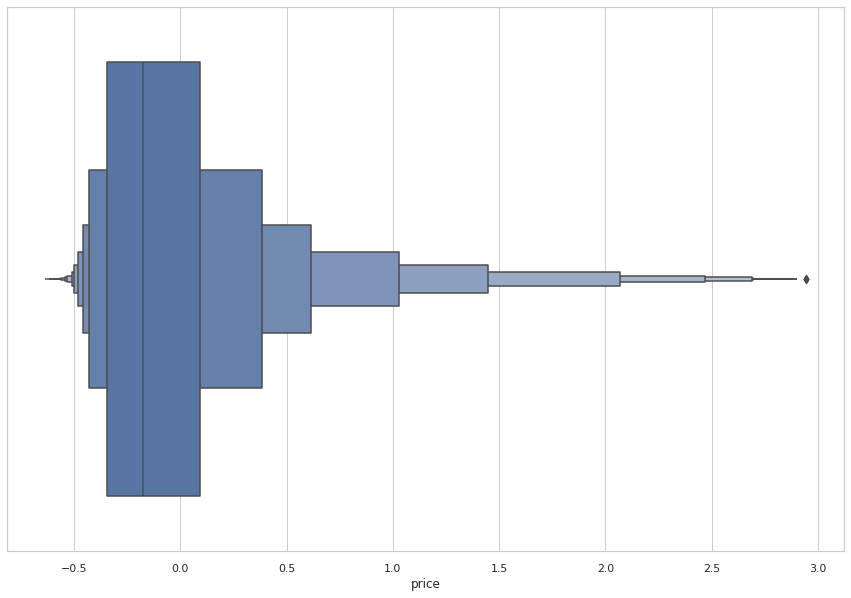

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxenplot(x=airbnb['price'])

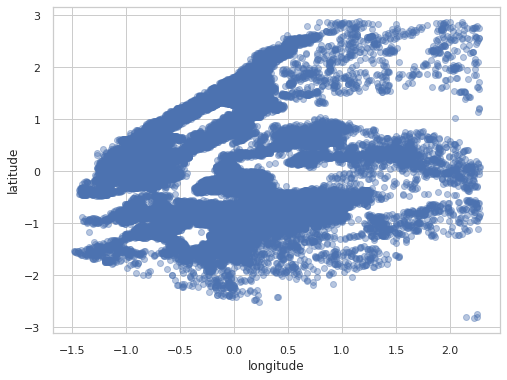

run time : 0.39368581771850586


In [ ]:
s_time = time.time()

price_95_percent = visual_data[visual_data['price'] <= visual_data.quantile(0.95)['price']]
plt.figure(figsize =(8, 6))
plt.scatter(price_95_percent['longitude_edit'], price_95_percent['latitude_edit'], cmap='plasma', alpha=0.4)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

print(f'run time : {time.time() - s_time}')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


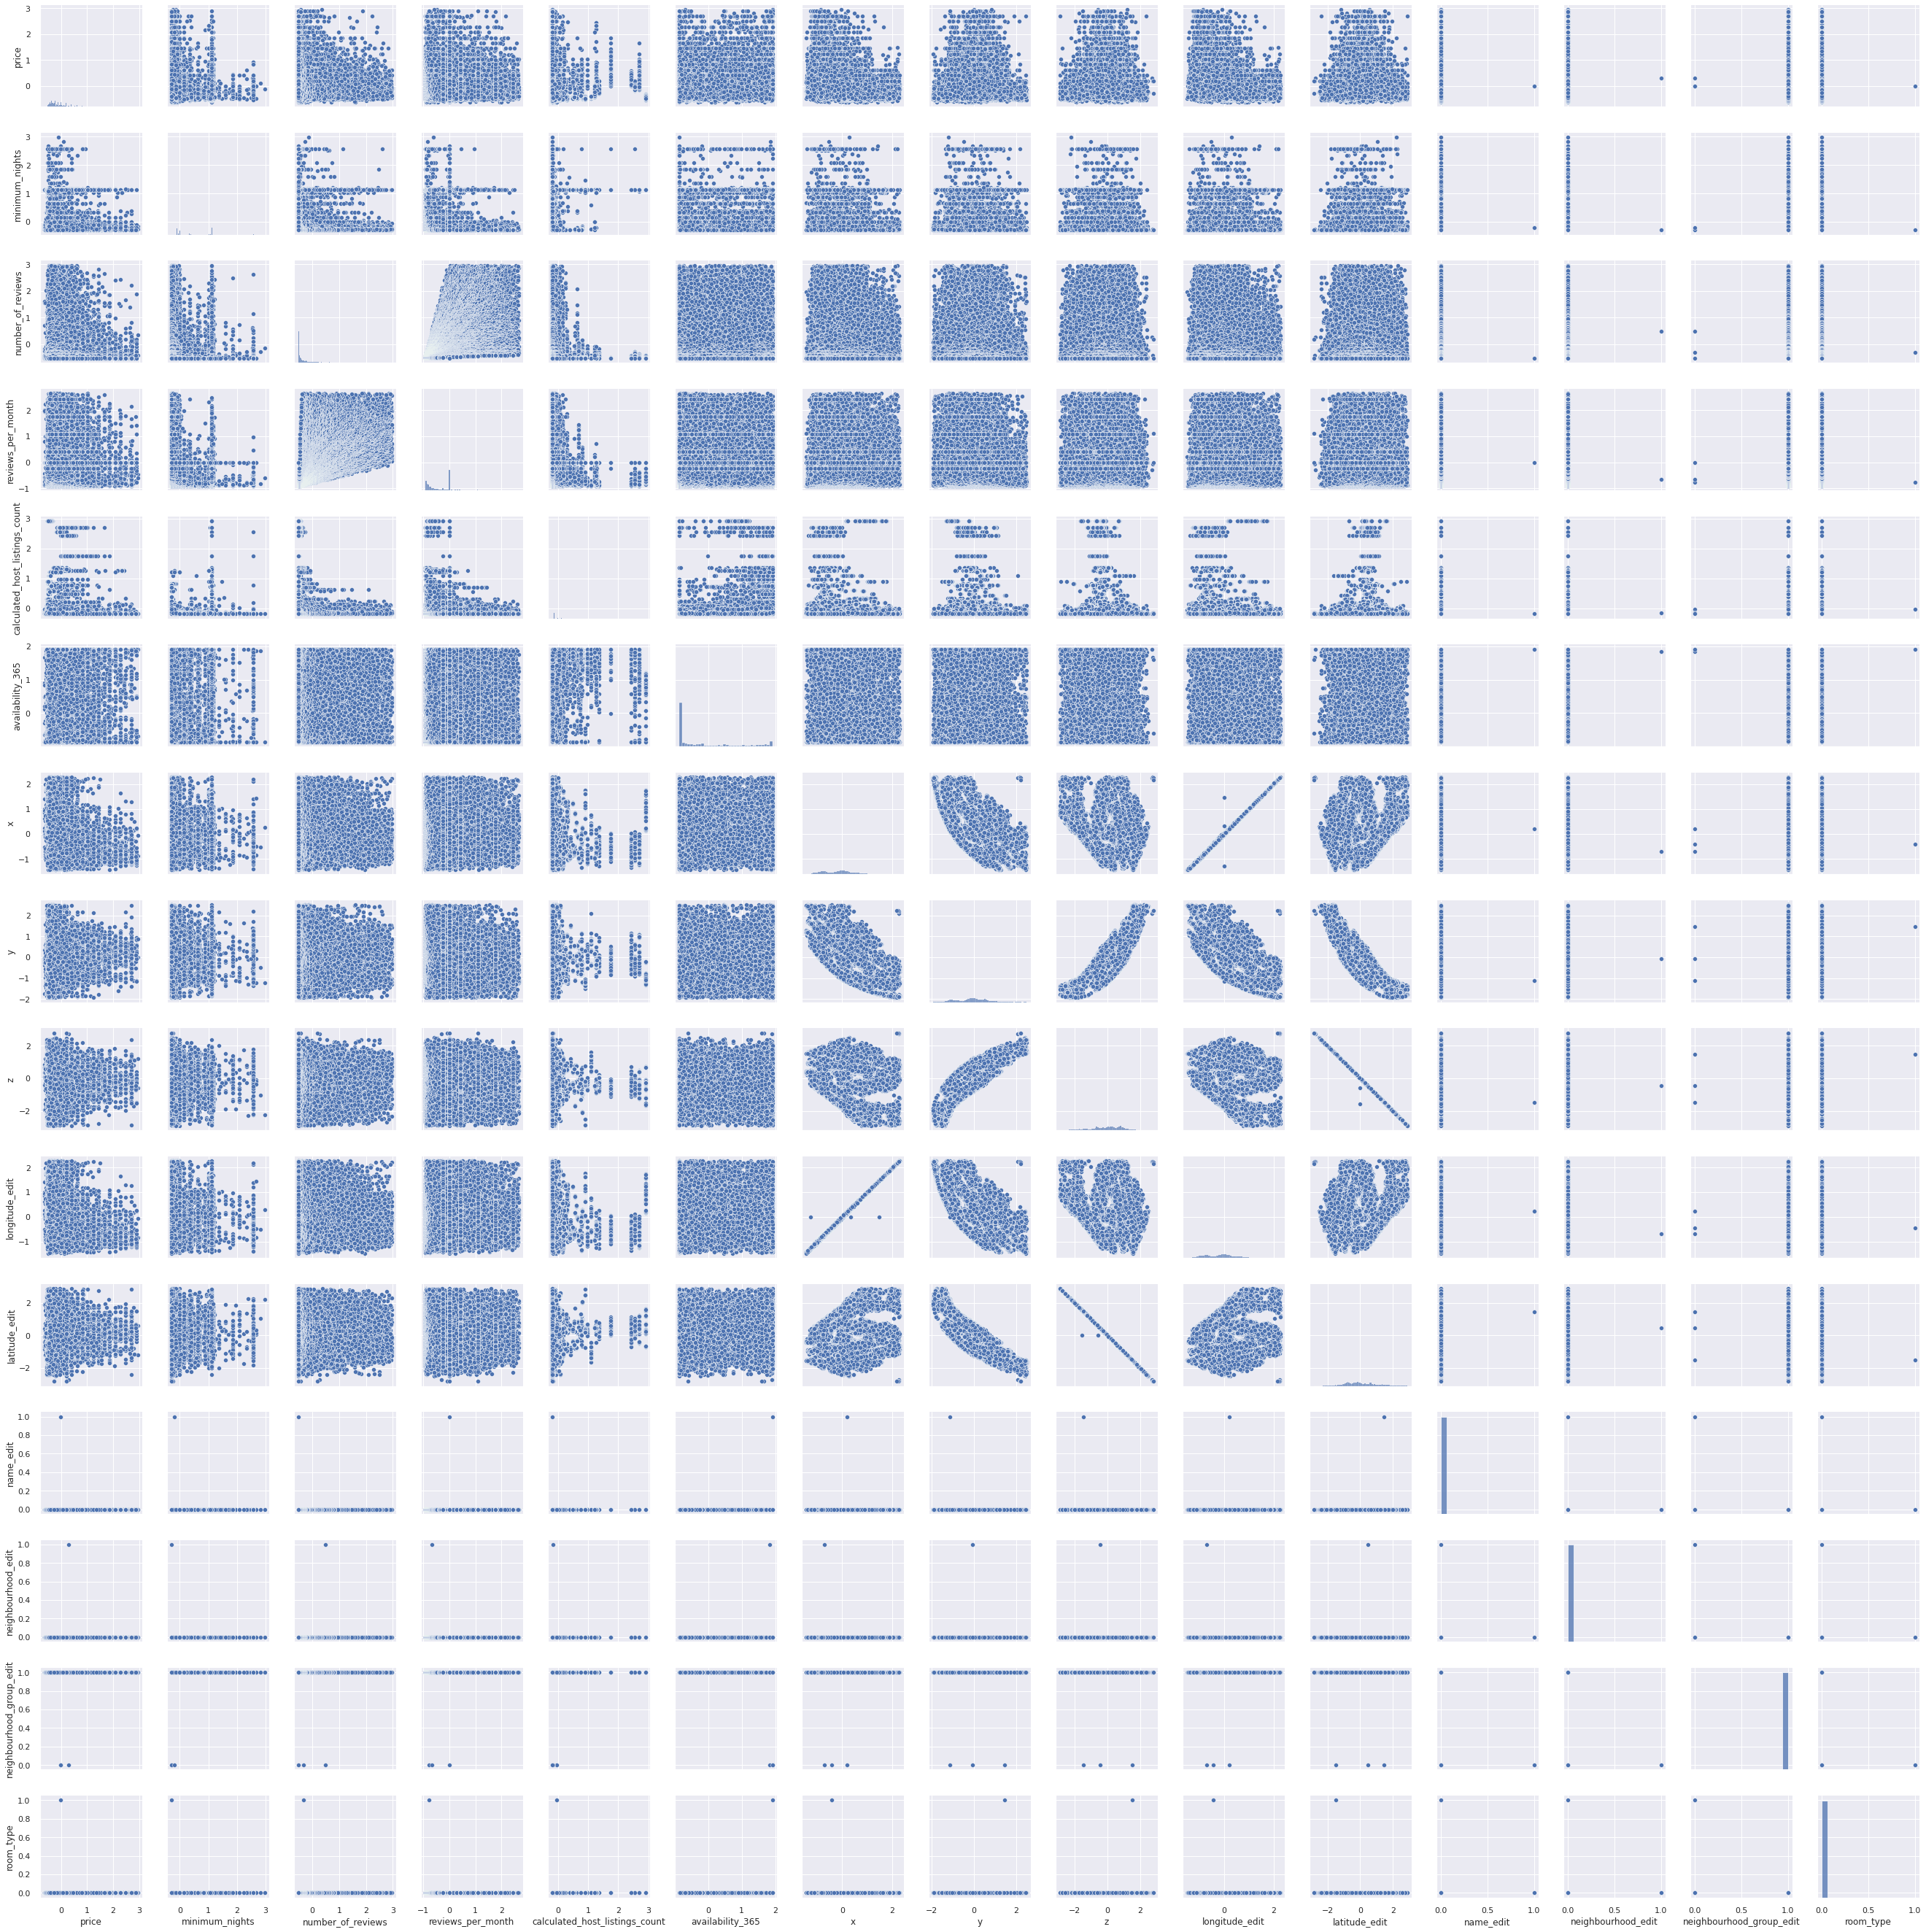

In [ ]:
sns.pairplot(airbnb[['host_id', 'host_name', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'x', 'y', 'z', 'longitude_edit', 'latitude_edit',
       'name_edit', 'neighbourhood_edit', 'neighbourhood_group_edit',
       'room_type']],size=2.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


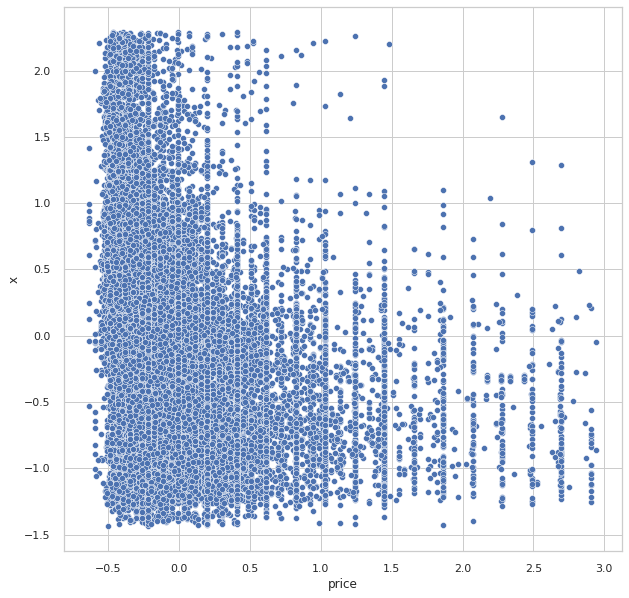

run time : 0.4616124629974365


In [ ]:
s_time = time.time()

from pylab import rcParams
rcParams['figure.figsize']=10,10
plot1=sns.scatterplot(airbnb['price'],airbnb['x']) 
plt.show()

print(f'run time : {time.time() - s_time}')

maximum price is in below record:

In [ ]:
#airbnb['price'].sort_values(ascending=False)

In [ ]:
s_time = time.time()
a=airbnb['price'].sort_values(ascending=False).head(1)
print("most (normalized) price is ",*a)
print("most price is advertised in record",a.index[0],
      " by id number: ",int(airbnb['host_id'][a.index]))
print(f'run time : {time.time() - s_time}')

most (normalized) price is  2.94510527782104
most price is advertised in record 5351  by id number:  14733148
run time : 0.02189922332763672


In [ ]:
s_time = time.time()
print('maximum price in each',airbnb.groupby("neighbourhood_edit")["price"].max())
print(f'run time : {time.time() - s_time}')

maximum price in each neighbourhood_edit
0.0    2.945105
1.0    0.300970
Name: price, dtype: float64
run time : 0.005852460861206055


In [ ]:
#airbnb.columns

minimum price is in below record:

In [ ]:
#airbnb['price'].sort_values(ascending=True)

In [ ]:
s_time = time.time()
b=airbnb['price'].sort_values(ascending=True).head(1)
print("minimum (normalized) price is ",*b)
print("minimum price is advertised in record",b.index[0],
      " by id number: ",int(airbnb['host_id'][b.index]))

print(f'run time : {time.time() - s_time}')

minimum (normalized) price is  -0.6359276932297263
minimum price is advertised in record 25753  by id number:  1641537
run time : 0.014966249465942383


In [ ]:
s_time = time.time()
print('minimum price in each',
      airbnb.groupby("neighbourhood_group_edit")["price"].min())
print(f'run time : {time.time() - s_time}')

minimum price in each neighbourhood_group_edit
0.0   -0.015493
1.0   -0.635928
Name: price, dtype: float64
run time : 0.007619380950927734


average price is in below record:

In [ ]:
s_time = time.time()
print('average price in each',
      airbnb.groupby("neighbourhood_edit")["price"].mean())
print(f'run time : {time.time() - s_time}')

average price in each neighbourhood_edit
0.0   -0.051904
1.0    0.300970
Name: price, dtype: float64
run time : 0.006597757339477539


In [ ]:
airbnb.columns

Index(['host_id', 'host_name', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'x', 'y', 'z', 'longitude_edit', 'latitude_edit',
       'name_edit', 'neighbourhood_edit', 'neighbourhood_group_edit',
       'room_type'],
      dtype='object')

  Relation between price and minimum_nights feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


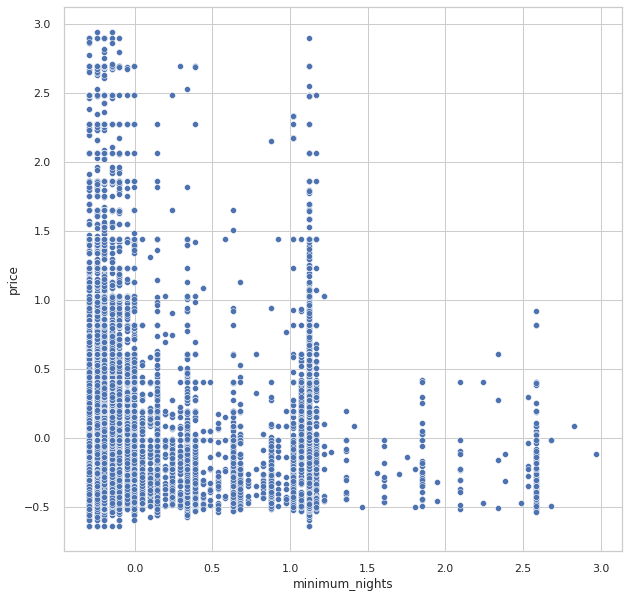

run time : 0.4286038875579834


In [ ]:
s_time = time.time()   
rcParams['figure.figsize']=10,10
sns.scatterplot(airbnb['minimum_nights'],airbnb['price'])
plt.show()
print(f'run time : {time.time() - s_time}')

  Relation between price and number_of_reviews feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


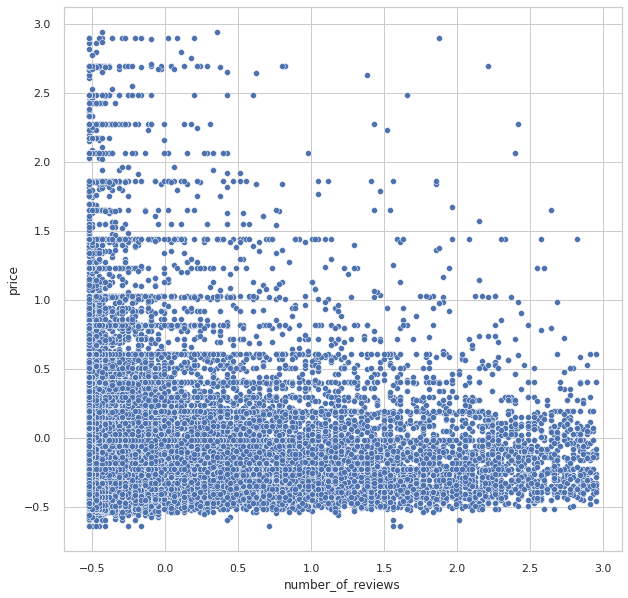

run time : 0.45836329460144043


In [ ]:
s_time = time.time()
rcParams['figure.figsize']=10,10
sns.scatterplot(airbnb['number_of_reviews'],airbnb['price'])
plt.show()
print(f'run time : {time.time() - s_time}')

In [ ]:
airbnb.groupby("room_type")["price"].mean()

room_type
0.0   -0.051897
1.0   -0.015493
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


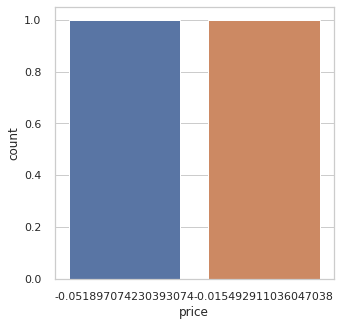

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(airbnb.groupby("room_type")["price"].mean())
plt.show()

**The most popular advertises**

plot based on relation between price and comments for advertisement

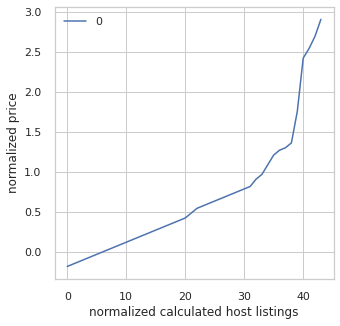

run time : 0.29157209396362305


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

s_time=time.time()
rcParams['figure.figsize']=5,5

d1=airbnb.groupby("calculated_host_listings_count")['price']

df1=pd.DataFrame(d1)
df1.plot(ylabel='normalized price',xlabel='normalized calculated host listings')
plt.show()
print(f'run time : {time.time() - s_time}')

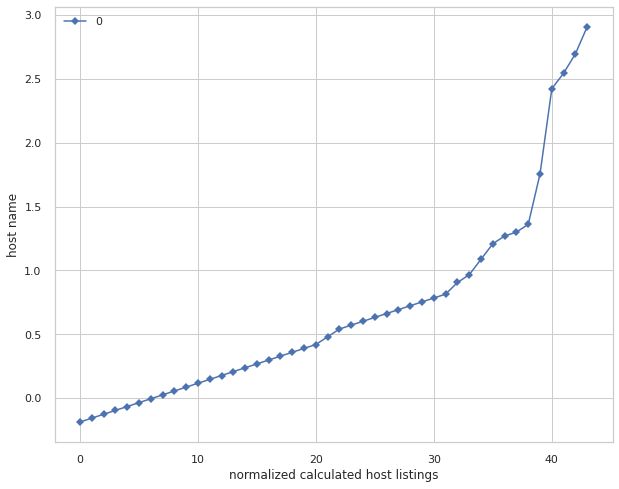

run time : 0.3240375518798828


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

s_time=time.time()
rcParams['figure.figsize']=10,8

d1=airbnb.groupby("calculated_host_listings_count")['host_name']
df1=pd.DataFrame(d1)
df1.plot(ylabel='host name',xlabel='normalized calculated host listings',marker='D',)
plt.show()
print(f'run time : {time.time() - s_time}')

In [ ]:
s_time=time.time()

import datetime
mask1=airbnb['calculated_host_listings_count']>airbnb['calculated_host_listings_count'].mean()
mask2=airbnb['last_review']> datetime.datetime(2016, 7, 2)
masked_df = airbnb[~(mask1 & mask2)]
df1=pd.DataFrame(masked_df)
print(df1)

print(f'run time : {time.time() - s_time}')

        host_id      host_name     price  minimum_nights  number_of_reviews  \
1          2845       Jennifer  0.300970       -0.293993           0.487660   
2          4632      Elisabeth -0.011329       -0.196482          -0.522428   
3          4632      Elisabeth -0.011329       -0.196482          -0.522428   
4          7192          Laura -0.302808        0.144805          -0.320410   
5          7322          Chris  0.196871       -0.196482           1.138605   
...         ...            ...       ...             ...                ...   
48890   8232441        Sabrina -0.344448       -0.245238          -0.522428   
48891   6570630        Marisol -0.469368       -0.147727          -0.522428   
48892  23492952  Ilgar & Aysel -0.157069        0.144805          -0.522428   
48893  30985759            Taz -0.406908       -0.293993          -0.522428   
48894  68119814     Christophe -0.261168       -0.001461          -0.522428   

      last_review  reviews_per_month  calculated_ho

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

s_time=time.time()
rcParams['figure.figsize']=5,5
d=airbnb.set_index(keys=['host_id','price'])
d.groupby(level=[0,1]).size()
df1=pd.DataFrame(d)
print(f'run time : {time.time() - s_time}')

run time : 0.0928494930267334


In [ ]:
d.groupby(level=[0]).size()

host_id
1000014     1
10001478    1
10001551    1
10002513    1
1000278     1
           ..
9996343     1
999689      1
9997184     1
9997747     1
9997988     1
Length: 33883, dtype: int64

In [ ]:
d['host_name'].value_counts

<bound method IndexOpsMixin.value_counts of host_id   price    
2787      -0.015493             John
2845       0.300970         Jennifer
4632      -0.011329        Elisabeth
          -0.011329        Elisabeth
7192      -0.302808            Laura
                           ...      
8232441   -0.344448          Sabrina
6570630   -0.469368          Marisol
23492952  -0.157069    Ilgar & Aysel
30985759  -0.406908              Taz
68119814  -0.261168       Christophe
Name: host_name, Length: 42703, dtype: object>

In [ ]:
#d.value_counts

In [ ]:
airbnb.groupby("neighbourhood_group_edit")["price"].mean().sort_values(ascending=False)

neighbourhood_group_edit
0.0    0.091383
1.0   -0.051906
Name: price, dtype: float64

In [ ]:
airbnb.groupby("availability_365")["price"].mean().sort_values(ascending=False)

availability_365
 1.095701    0.503593
 0.693034    0.400097
 1.088103    0.286396
 0.882971    0.263638
 1.407198    0.234928
               ...   
-0.484578   -0.153770
 0.746216   -0.164041
-0.013534   -0.170727
-0.302239   -0.172700
 0.533486   -0.173493
Name: price, Length: 366, dtype: float64

In [ ]:
airbnb.groupby("minimum_nights")["price"].mean().sort_values(ascending=False).head(1)

minimum_nights
1.022403    0.166088
Name: price, dtype: float64

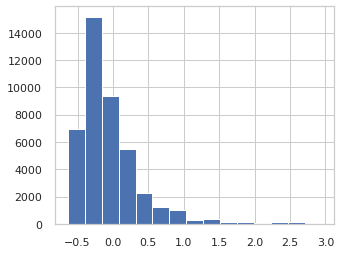

In [ ]:
airbnb['price'].hist(bins=15,figsize=(5,4))

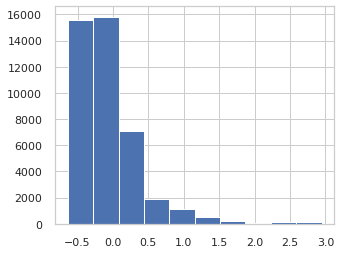

In [ ]:
airbnb['price'][airbnb["price"]<1000].hist(figsize=(5,4))

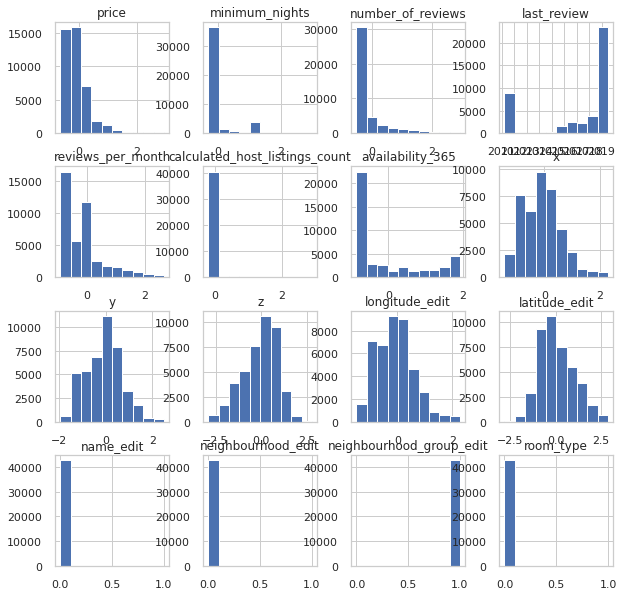

In [ ]:
airbnb[airbnb["price"]<250].hist(figsize=(10,10))
plt.show()

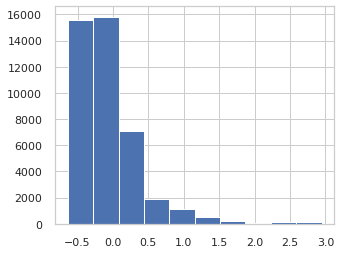

In [ ]:
airbnb["price"][airbnb["price"]<250].hist(figsize=(5,4))

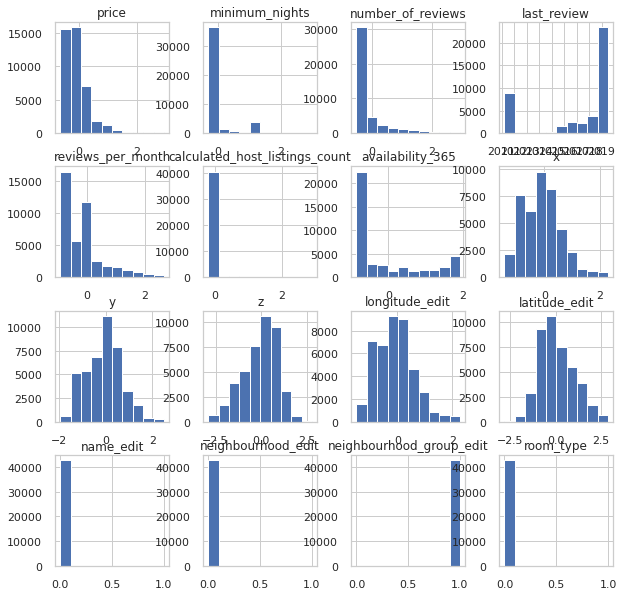

In [ ]:
airbnb[airbnb["price"]<80  ].hist(figsize=(10,10))
plt.show()

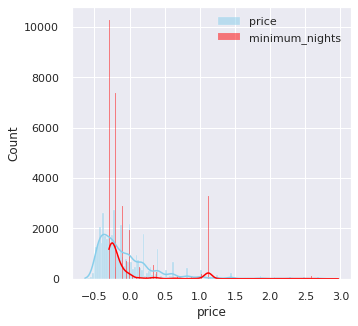

run time : 1.9926753044128418


In [ ]:
s_time=time.time()
sns.set(style="darkgrid")
plt.figure.figsize=[9,9]
sns.histplot(data=airbnb,x="price", color="skyblue", label="price", kde=True)
sns.histplot(data=airbnb,x="minimum_nights", color="red", label="minimum_nights", kde=True)
plt.legend() 
plt.show()
print(f'run time : {time.time() - s_time}')   

**Dataset distribution plot**

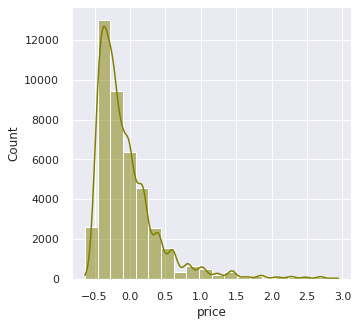

In [ ]:
sns.histplot(airbnb.price,bins=20,color="olive",kde=True)    
plt.show()

**Scatter matrix**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plo

<Figure size 360x360 with 0 Axes>

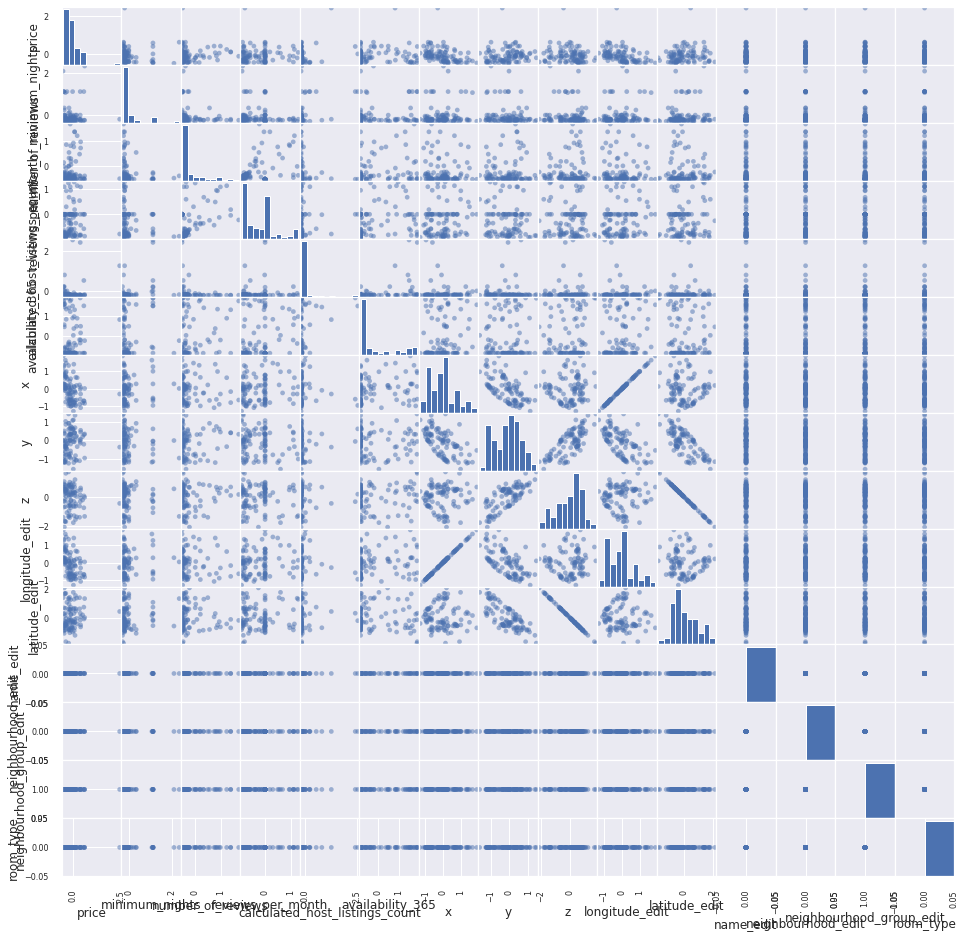

In [ ]:
import seaborn as sns
from pandas.plotting import scatter_matrix
#df=pd.DataFrame(airbnb.sample(frac=2, replace=True, random_state=1))
df=pd.DataFrame(airbnb.sample(100))
plt.figure()
pd.plotting.scatter_matrix(df,alpha=0.5 ,figsize=(16,16),marker='.',s=90)
plt.show()

In [ ]:
print("3 random prices:")
airbnb['price'].sample(n=3, random_state=1)

3 random prices:


32021   -0.444384
9685     0.134411
12238    0.592450
Name: price, dtype: float64

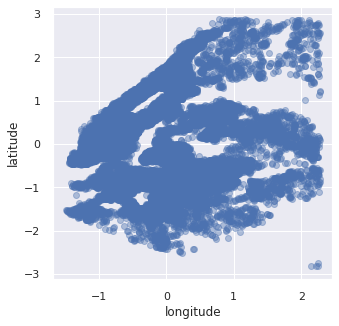

run time : 0.3824913501739502


In [ ]:
s_time=time.time()
plt.scatter(airbnb['longitude_edit'],airbnb['latitude_edit'], cmap=plt.get_cmap('jet'), alpha=0.4)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()
print(f'run time : {time.time() - s_time}')

In [ ]:
#airbnb

In [ ]:
s_time = time.time()
data_onehot1 = pd.get_dummies(airbnb, columns=['neighbourhood_group_edit',
                                               "room_type"], 
                              prefix = ['ng',"rt"],drop_first=True)
data_onehot1.drop(["name_edit"], axis=1, inplace=True)
print(data_onehot1.shape)
data_onehot2 = pd.get_dummies(airbnb, 
                              columns=['neighbourhood_group_edit',
                                       'number_of_reviews',"room_type"],
                               prefix = ['ng',"nr","rt"],drop_first=True)

print(data_onehot2.shape)

XL1= data_onehot2.loc[:, data_onehot2.columns != 'price']
YL1 = data_onehot2["price"]

print(f'run time : {time.time() - s_time}')

(42703, 17)
(42703, 172)
run time : 0.16533565521240234


In [ ]:
XL1
YL1

0       -0.015493
1        0.300970
2       -0.011329
3       -0.011329
4       -0.302808
           ...   
48890   -0.344448
48891   -0.469368
48892   -0.157069
48893   -0.406908
48894   -0.261168
Name: price, Length: 42703, dtype: float64

In [ ]:
s_time = time.time()
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(f'run time : {time.time() - s_time}')               

run time : 0.0010824203491210938


In [ ]:
rm_grid

{'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

# **other info**

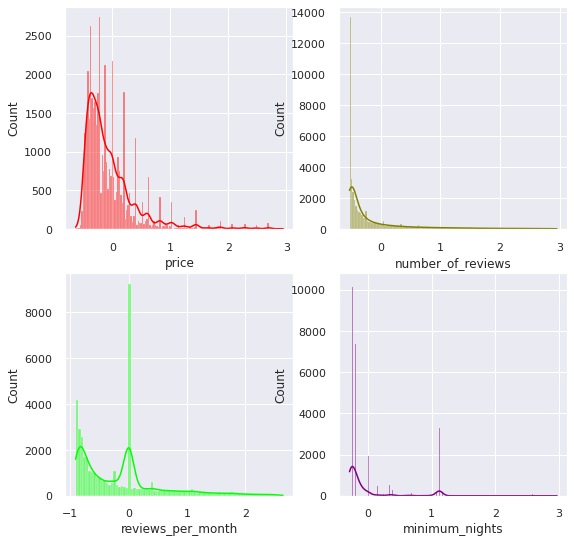

run time : 3.5312798023223877


In [ ]:
s_time = time.time()
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(data=airbnb, x="price", kde=True, color="red", ax=axs[0, 0])
sns.histplot(data=airbnb, x="number_of_reviews", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=airbnb, x="reviews_per_month", kde=True, color="lime", ax=axs[1, 0])
sns.histplot(data=airbnb, x="minimum_nights", kde=True, color="purple", ax=axs[1, 1])

plt.show()
print(f'run time : {time.time() - s_time}') 

**Classification neighbourhoods based on being coastal**

Number of data in coastal neighbourhood groups 

In [ ]:
airbnb['neighbourhood_group_edit'].value_counts()

1.0    42700
0.0        3
Name: neighbourhood_group_edit, dtype: int64

In [ ]:
s_time = time.time()
coastal_neighborhoods = ['Wooded Area', 'Ocean Beach', 'Pacific Beach',
                         'La Jolla', 'Torrey Pines', 'Del Mar Heighs',
                         'Mission Bay','Bronx','Brooklyn','Queens','Staten Island']
def coastal(neigh):
    if neigh in coastal_neighborhoods:
        return 'coastal neighborhood'
    else:
        return 'not coastal neighborhood'

airbnb['coastal_neig'] = airbnb['neighbourhood_group_edit'].apply(coastal)
airbnb['coastal_neig'].to_frame()

#airbnb.plot(column='coastal_neig', s=1,categorical=True, legend=True)
print(airbnb['coastal_neig'].value_counts())
print(f'run time : {time.time() - s_time}') 

not coastal neighborhood    42703
Name: coastal_neig, dtype: int64
run time : 0.029288291931152344


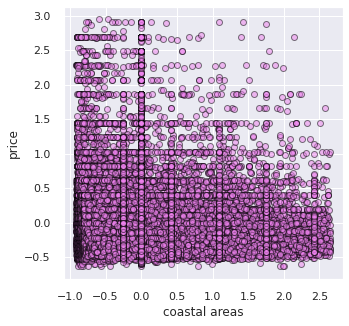

run time : 0.38131046295166016


In [ ]:
s_time = time.time()
import matplotlib.pyplot as plt
x=airbnb['reviews_per_month']
y=airbnb['price']
fig.figure=(20,20)
plt.xlabel('coastal areas')
plt.ylabel('price')
plt.scatter(x, y, color="violet", alpha=0.5, label="coastal areas",edgecolor='black')
plt.show()
print(f'run time : {time.time() - s_time}') 

In [ ]:
#airbnb.head(1)

Property type classification

In [ ]:
s_time = time.time()
from scipy.special.orthogonal import roots_hermitenorm

def classify(p):
    bigs = ['House', 'Entire home/apt', 'Condominium', 'Townhouse']
    room =['Private room']
    
    if p in bigs:
        return 'enough space for family'
    elif p in room:
        return 'small place for family,suitable for up to 2 persons'   
    else:
        return 'other'

airbnb['property_group'] = airbnb['room_type'].apply(classify)
print(airbnb['property_group'])

print(f'run time : {time.time() - s_time}') 

0        other
1        other
2        other
3        other
4        other
         ...  
48890    other
48891    other
48892    other
48893    other
48894    other
Name: property_group, Length: 42703, dtype: object
run time : 0.030907630920410156


In [ ]:
airbnb.head()

host_id  host_name     price  minimum_nights  number_of_reviews last_review  \
0    2787       John -0.015493       -0.293993          -0.320410  2018-10-19   
1    2845   Jennifer  0.300970       -0.293993           0.487660  2019-05-21   
2    4632  Elisabeth -0.011329       -0.196482          -0.522428  2012-01-01   
3    4632  Elisabeth -0.011329       -0.196482          -0.522428  2012-01-01   
4    7192      Laura -0.302808        0.144805          -0.320410  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0      -7.766330e-01                       -0.034716          1.916231   
1      -6.631313e-01                       -0.156103          1.840256   
2       2.668494e-15                       -0.186450          1.916231   
3       2.668494e-15                       -0.186450          1.916231   
4      -8.500753e-01                       -0.186450         -0.856856   

          x         y         z  longitude_edit  latitude_edit  name_edit  \
0 -0.406389  1.474684  1.489525       -0.437648      -1.493834        0.0   
1 -0.701463 -0.062916 -0.450443       -0.684632       0.452431        0.0   
2  0.202426 -1.118506 -1.471683        0.222494       1.468384        1.0   
3  0.202426 -1.118506 -1.471683        0.222494       1.468384        0.0   
4  0.157621 -1.044196 -1.277708        0.177214       1.275647        0.0   

   neighbourhood_edit  neighbourhood_group_edit  room_type  \
0                 0.0                       0.0        1.0   
1                 1.0                       0.0        0.0   
2                 0.0                       0.0        0.0   
3                 0.0                       1.0        0.0   
4                 0.0                       1.0        0.0   

               coastal_neig property_group  
0  not coastal neighborhood          other  
1  not coastal neighborhood          other  
2  not coastal neighborhood          other  
3  not coastal neighborhood          other  
4  not coastal neighborhood          other

In [ ]:
airbnb["room_type"]
max_host = airbnb["property_group"].head(1)

In [ ]:
r = airbnb["reviews_per_month"].value_counts()
rm=r.idxmax()
print(rm," is the max rate of reviews")

2.6684937897181106e-15  is the max rate of reviews


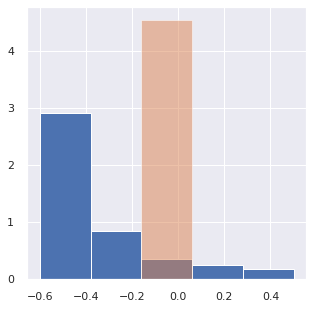

In [ ]:
_, bins, _ = plt.hist(airbnb['number_of_reviews'], bins=5, range=[-0.6,0.5], density=True)
_ = plt.hist(airbnb['room_type'], bins=bins, alpha=0.5, density=True, color=None, label=True)
plt.show()

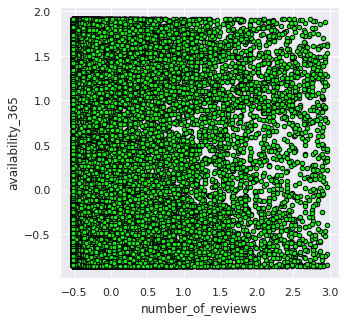

In [ ]:
fig.figure=20,20
airbnb.plot.scatter(y='availability_365', x ="number_of_reviews" ,color='lime',edgecolor='black')
plt.show()

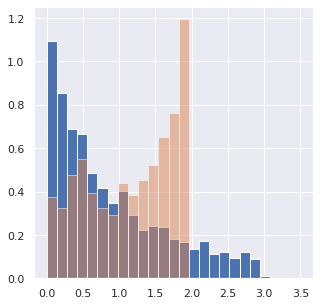

In [ ]:
_, bins, _ = plt.hist(airbnb['number_of_reviews'], bins=25, range=[0,3.5], density=True)
_ = plt.hist(airbnb['availability_365'], bins=bins, alpha=0.5, density=True)
plt.show()

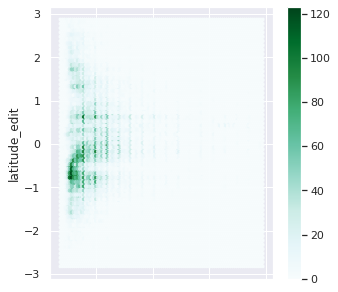

In [ ]:
airbnb.plot.hexbin(x="price", y ="latitude_edit")

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

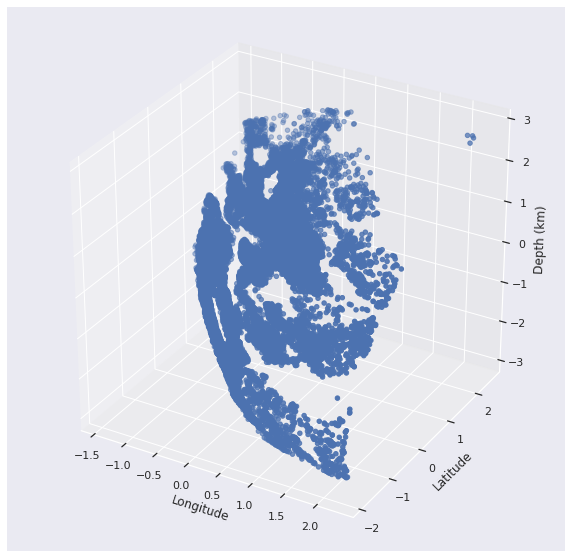

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(airbnb.x,airbnb.y,airbnb.z,cmap=plt.get_cmap('plasma')) # plot the point on the figure
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth (km)')
plt.show()

## **Hypothesis test**

**1.normality test:**

 Shapiro-Wilk Normality Test

In [ ]:
s_time = time.time()
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = airbnb['price']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian\n')
else:
	print('Probably not Gaussian\n')
 
print(f'run time : {time.time() - s_time}') 

stat=0.774, p=0.000
Probably not Gaussian

run time : 0.0061893463134765625


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
s_time = time.time()
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = airbnb['price']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))
	
print(f'run time : {time.time() - s_time}') 

stat=2230.099
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
run time : 0.019568443298339844


**2.Correlation Tests:**

Pearson’s Correlation Coefficient

In [ ]:
s_time = time.time()
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = airbnb['price']
data2 = airbnb['room_type']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent\n')
else:
	print('Probably dependent\n')

print(f'run time : {time.time() - s_time}') 

stat=0.000, p=0.936
Probably independent

run time : 0.011238336563110352


In [ ]:
s_time = time.time()
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = airbnb['price']
data2 = airbnb['latitude_edit']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent\n')
else:
	print('Probably dependent\n')
 
print(f'run time : {time.time() - s_time}') 

stat=0.130, p=0.000
Probably dependent

run time : 0.02237415313720703


In [ ]:
#airbnb

the Spearman's Rank Correlation Test

In [ ]:
s_time = time.time()
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = airbnb['price']
data2 = airbnb['calculated_host_listings_count']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
 
print(f'run time : {time.time() - s_time}') 

stat=-0.127, p=0.000
Probably dependent
run time : 0.034232378005981445


**3.Stationary Tests**

Augmented Dickey-Fuller test

In [ ]:
s_time = time.time()
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = airbnb['minimum_nights']
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')
 
print(f'run time : {time.time() - s_time}') 

stat=-32.202, p=0.000
Probably Stationary
run time : 7.424443244934082


Kwiatkowski-Phillips-Schmidt-Shin test ( trying different data ):

In [ ]:
s_time = time.time()
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = airbnb['calculated_host_listings_count']
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Stationary\n')
else:
	print('Probably not Stationary\n')
 
print(f'run time : {time.time() - s_time}') 

stat=3.733, p=0.010
Probably not Stationary

run time : 0.014691591262817383


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


**4.Parametric Statistical Hypothesis Tests**

Student’s t-test

In [ ]:
s_time = time.time()
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = airbnb['price']
data2 = airbnb['calculated_host_listings_count']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
print(f'run time : {time.time() - s_time}') 

stat=18.573, p=0.000
Probably different distributions
run time : 0.004858970642089844


Analysis of Variance Test

In [ ]:
s_time = time.time()
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = airbnb['price']
data2 = airbnb['availability_365']
data3 = airbnb['number_of_reviews']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
print(f'run time : {time.time() - s_time}') 

stat=120.396, p=0.000
Probably different distributions
run time : 0.007915735244750977


**5.Nonparametric Statistical Hypothesis Tests**

The Mann-Whitney U Test

In [ ]:
s_time = time.time()
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = airbnb['coastal_neig']
data2 = airbnb['host_name']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print(f'run time : {time.time() - s_time}') 

stat=2732992.000, p=0.000
Probably different distributions
run time : 0.07653164863586426


The Wilcoxon Signed-Rank Test

In [ ]:
airbnb.columns

Index(['host_id', 'host_name', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'x', 'y', 'z', 'longitude_edit', 'latitude_edit',
       'name_edit', 'neighbourhood_edit', 'neighbourhood_group_edit',
       'room_type', 'coastal_neig'],
      dtype='object')

In [ ]:
s_time = time.time()
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = airbnb['price']
data2 = airbnb['y']
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
print(f'run time : {time.time() - s_time}') 

stat=442061720.000, p=0.000
Probably different distributions
run time : 0.01630711555480957


Kruskal-Wallis H Test

In [ ]:
s_time = time.time()
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = airbnb['host_name']
data2 = airbnb['host_id']
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
 
print(f'run time : {time.time() - s_time}') 

stat=63995.120, p=0.000
Probably different distributions
run time : 2.1085128784179688
